## Importations et définitions de fonctions

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from IPython.display import Image

In [117]:
#from google.colab import drive
#drive.mount('/content/drive')

## Lecture de données dans un DataFrame

In [118]:
data = pd.read_csv('/content/Stars.csv', sep=",", decimal='.')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [119]:
data.shape

(240, 7)

      Remarques : 

      -- Ce jeu de données est petit, ne contenant que 240 lignes   

      --Il contient 7 colonnes



In [120]:
data.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

   Définitions de colonne  :   

   Température - Température de l’étoile, exprimée en degrés de Kelvin: (K)    

   L - Luminosité relative, exprimée en termes de luminosité solaire nominale : (L/L⊙)

   R - Rayon relatif, exprimé en termes de rayon solaire nominal: (R/R⊙)

   A_M - Magnitude absolue, exprimée en: (Mv)

   Couleur - Couleur observable de l’étoile

   Spectral_Class - Classe spectrale de l’étoile, classée dans le système Morgan-Keenan (MK)

   Type - Type of the star:

     Naine rouge - 0

     Naine brune - 1

     Naine blanche - 2

     Séquence principale - 3

     Super Géant - 4

     Hyper Géant - 5





## Les types des variables et Vérification de la valeur Null

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [122]:
#afficher la somme des valeur null dans chaque variable
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [123]:
data=data.dropna() #supprimer tous les valeur nulls
print(np.shape(data))

(240, 7)


    remarques :    


   Il n’y a pas de valeurs null
   
  4 colonnes contiennent des valeurs numériques :
    
*   Temperature (int64)
*   L (float64)
*   R (float64)
*   A_M (float64)

3 colonnes contiennent des valeurs catégorielles :

*   Color (object)
*   Spectral_Class (object)
*   Type (int64)

La variable Target  est Type














# Analyse exploratoire des données

Dans cette partie on va etudier les differentes relation entre la variable target et les autres variables


### La distribution de variable target 

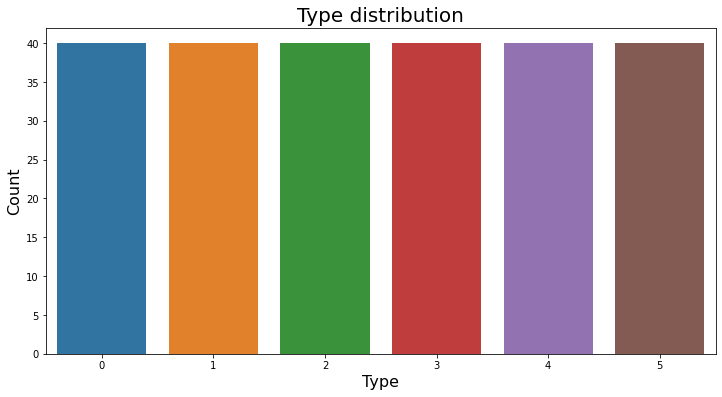

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Type", data=data)
plt.title("Type distribution", fontsize=20)
plt.xlabel("Type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

    Remarques :     

 Il y a un nombre égal de lignes correspondant à chaque type d’étoile - 

*   Il y a un nombre égal de lignes correspondant à chaque type d’étoile,Les classes sont complètement équilibrées.


* Chacun des 6 types a 40 observations correspondantes





---



### Exploration de variables numériques et ingénierie préliminaire des caractéristiques

In [125]:
data_vars_num = data.loc[:, ["Temperature", "L", "R", "A_M"]]
data_vars_num.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


### Boxplot

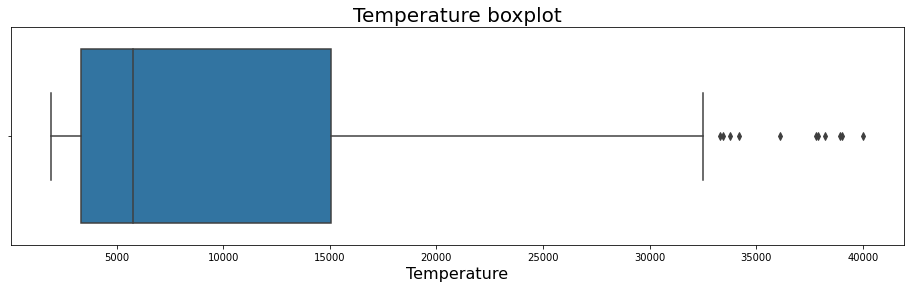

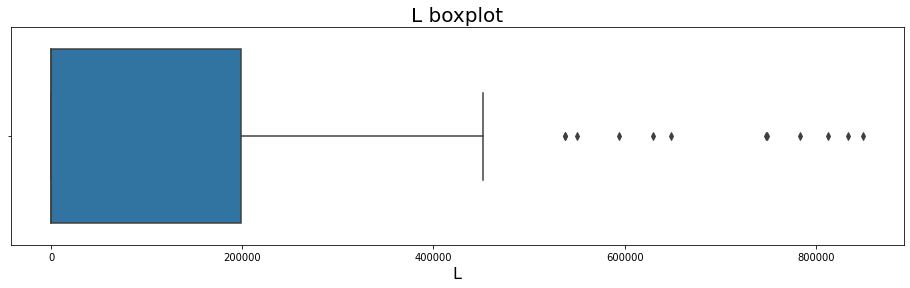

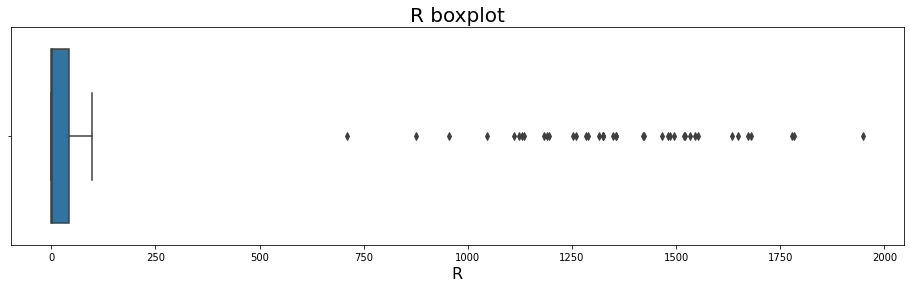

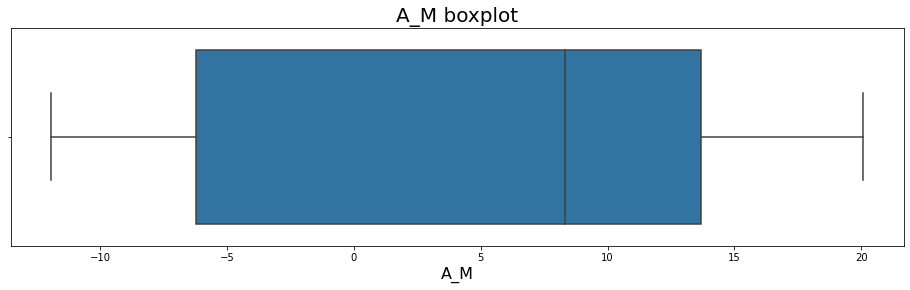

In [126]:
for col_name in data_vars_num:
    plt.figure(figsize=(16, 4))
    sns.boxplot(x=data_vars_num[col_name])
    plt.title(col_name+ " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.xticks(fontsize=10)
    plt.show()

    Remarques :     

  on peur observer que Les variables de température, L et R contiennent des valeurs aberrantes

---



### Histogrammes

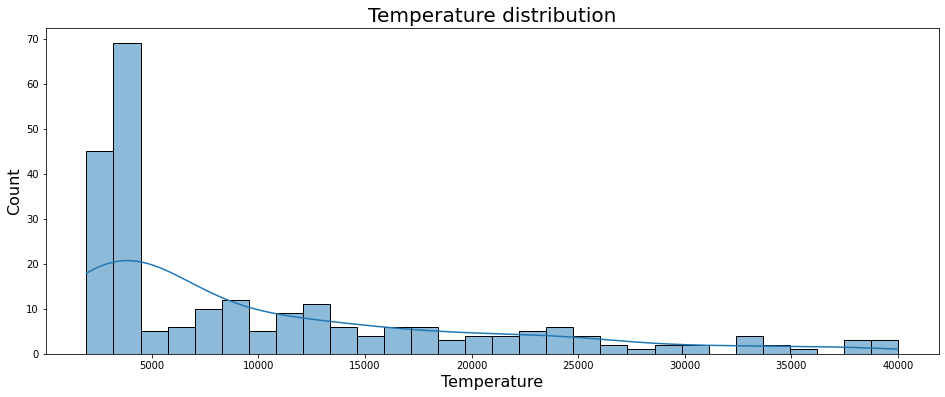

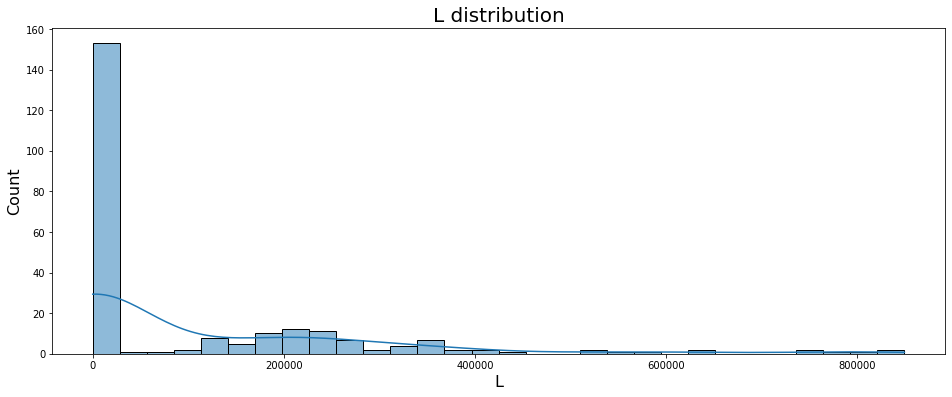

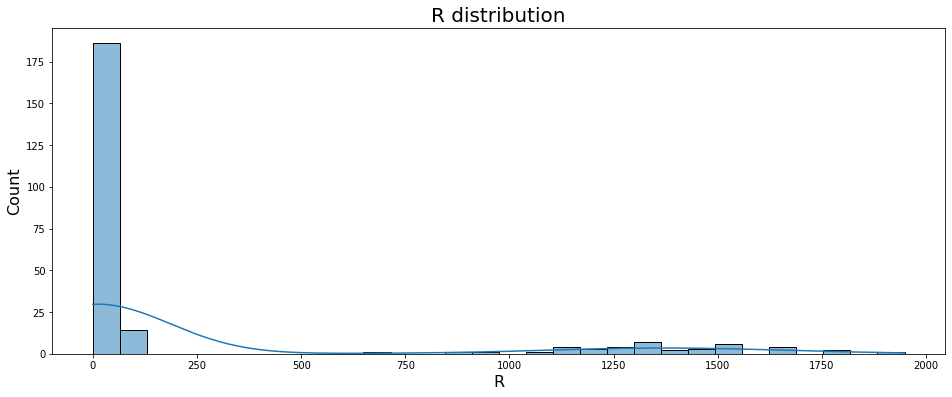

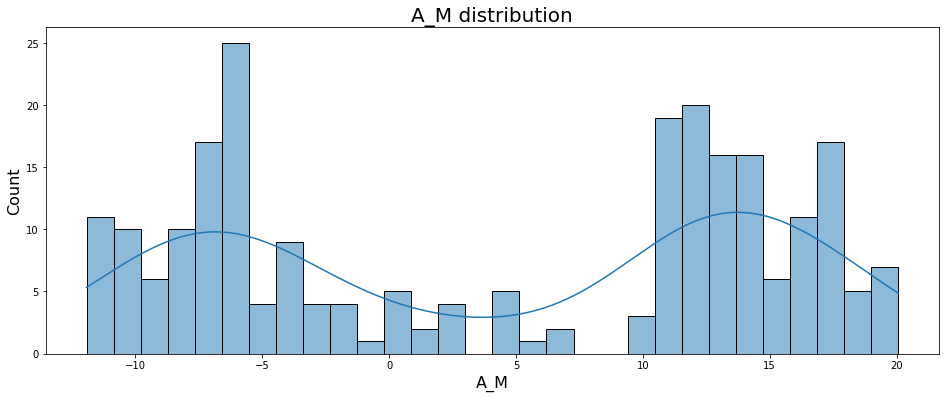

In [127]:
for col_name in data_vars_num:
    
    plt.figure(figsize=(16, 6))
    sns.histplot(x=col_name, kde=True, bins=30, data=data_vars_num)
    plt.title(col_name+ " distribution", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    remarques :    

1.  Aucune des variables numériques ne suit la loi gaussienne.

2.   Pour les variables Température, L et R - La grande majorité des 
 valeurs est contenue sur le bord extrême gauche de la distribution.  

3.   Pour A_M variables - La majorité des valeurs est contenue sur les côtés gauche et droit de la distribution.



---



### Boxplot Variable/Target

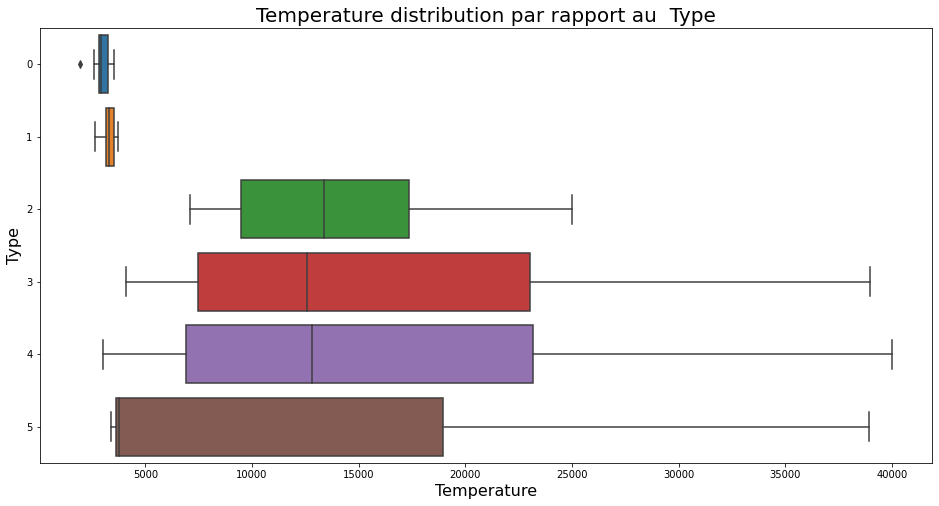

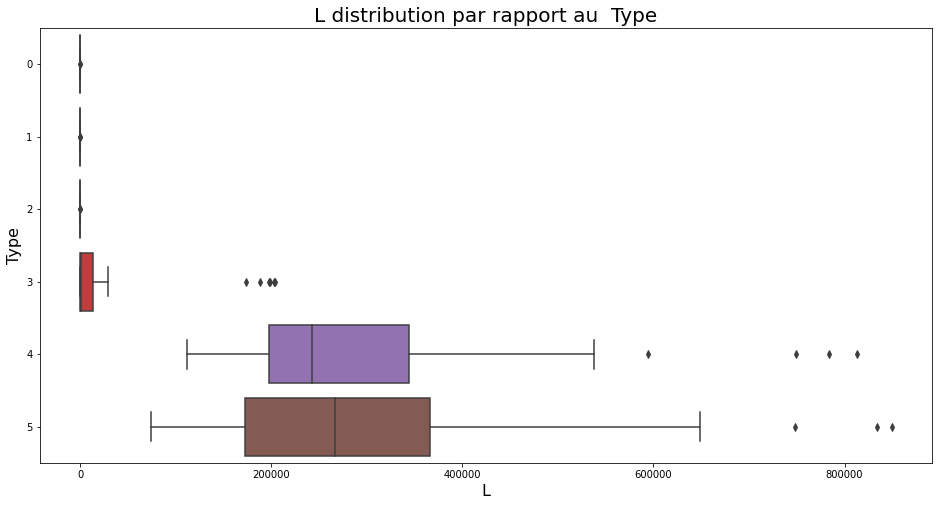

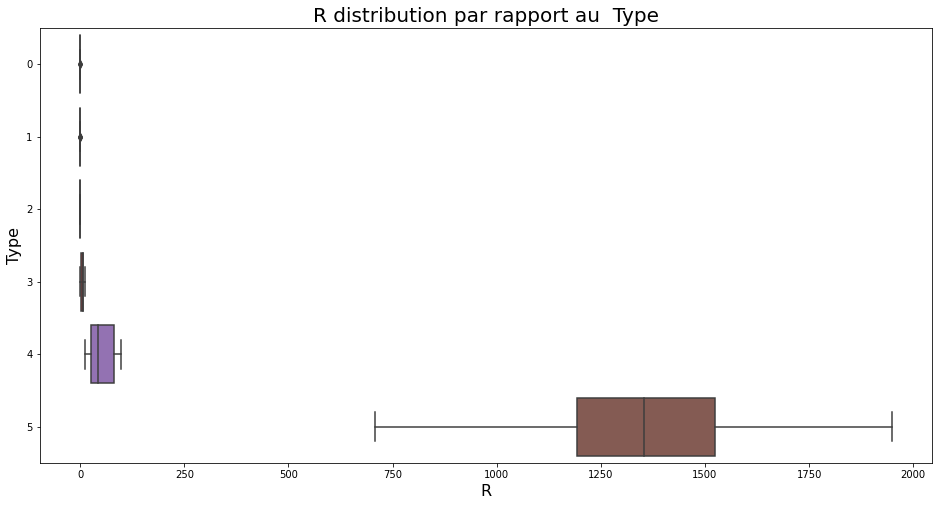

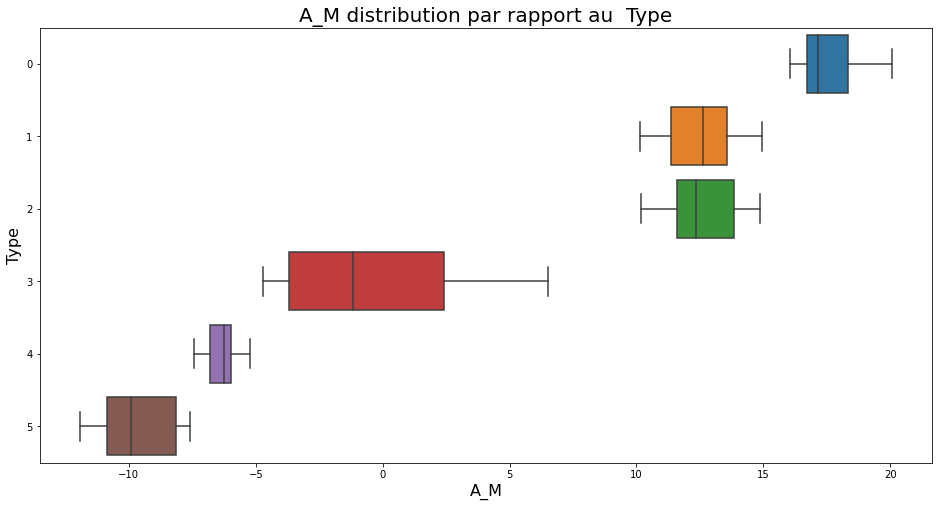

In [128]:
for col_name in data_vars_num:
    plt.figure(figsize=(16, 8))
    sns.boxplot(y="Type", x=col_name, data=data, orient="h")
    plt.title(col_name+ " distribution par rapport au  Type", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.ylabel("Type", fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    remarques :    

1.   Toutes les étoiles de type 0 et 1 ont une température inférieure à 5000

2.   Les étoiles des types 0-2 ont une luminosité beaucoup plus faible que celles des types 4-5. La majorité des étoiles de type 3 ont également une luminosité beaucoup plus faible, à l’exclusion de quelques valeurs aberrantes.

3.   Les étoiles de type 5 ont un rayon beaucoup plus grand que les autres types

4.   La magnintude absolue (A_M) semble progressivement diminuer pour les étoiles de type supérieur







---



### Exploration de variables catégorielles

### Quelques mesures statistiques

In [129]:
data_vars_cat = data.loc[:, ["Color", "Spectral_Class"]]
data_vars_cat.describe()

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


    remarques :    

*   Il y a 17 valeurs uniques de couleur et 7 valeurs uniques de Spectral_Class

*   Le rouge est la couleur la plus courante et il apparaît 112 fois  

*   M est la classe spectrale la plus courante et elle apparaît 111 fois






---



In [130]:
print(data["Color"].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


    remarques :    

*   On peut remarquer qu’il y a plusieurs valeurs qui sont presque exactement les mêmes, à savoir:

  *   "yellowish", "Yellowish", "Yellow"
  *   "Blue White", "Blue white", "Blue-white", "Blue-White"
  *   "yellow-white" and "White-Yellow"
  *   "white", "White", "Whitish"

*   Les valeurs similaires mentionnées ci-dessus peuvent être remappées pour éliminer la redondance

*  Nous allons changer le nom de la colonne « Couleur » en « Color_name » et utiliser le nom « Couleur » pour la colonne codée par étiquette nouvellement créée à la place   






---





### Remappage des valeurs de couleur

In [131]:
remap_dict = {
    'Red': 'Red',
    'Blue White': 'Blue-White',
    'White': 'White',
    'Yellowish White': 'White-Yellow',
    'Blue white': 'Blue-White',
    'Pale yellow orange': 'Yellow-Orange',
    'Blue': 'Blue',
    'Blue-white': 'Blue-White',
    'Whitish': 'White',
    'yellow-white': 'White-Yellow',
    'Orange': 'Orange',
    'White-Yellow': 'White-Yellow',
    'white': 'White',
    'yellowish': 'Yellow',
    'Yellowish': 'Yellow',
    'Orange-Red': 'Orange-Red',
    'Blue-White': 'Blue-White'
}

data["Color_name"] = data["Color"].map(remap_dict)
data["Color_name"].unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Yellow-Orange',
       'Blue', 'Orange', 'Yellow', 'Orange-Red'], dtype=object)

    Remarques :    

  apres le remappage  des valeurs de couleur, le nombre total de valeurs uniques a été réduit de 17 à 9

---



### Counplot pour variable couleur

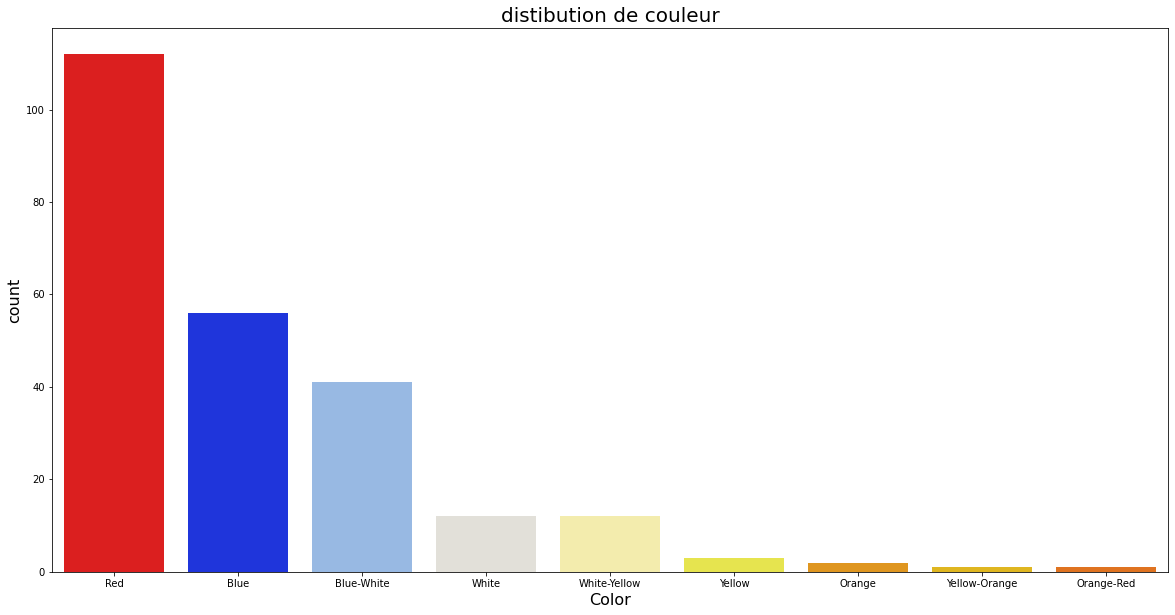

In [132]:
plt.figure(figsize=(20, 10))
palette = {"Red": "#fa0000", "Blue": "#001dfa", "Blue-White": "#8bb7f0", "White": "#e3e1d8",
           "White-Yellow": "#fff6a1", "Yellow": "#fffc36", "Orange": "#ff9d00", "Orange-Red": "#ff6f00",
           "Yellow-Orange": "#ffc800"}
plot = sns.countplot(x="Color_name", data=data,
              order=data["Color_name"].value_counts().index, palette=palette)
plt.title("distibution de couleur", fontsize=20)
plt.xlabel("Color", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

    remarques :  

*   Le rouge est la couleur la plus courante, l’orange-rouge et le 
jaune-orange sont les moins communs (chacun n’a qu'1 occurrence).  

### Codage des variables de couleur

In [133]:
remap_dict_2 = {
    "Red": 0,
    "Orange-Red": 1,
    "Orange": 2,
    "Yellow-Orange": 3,
    "Yellow": 4,
    "White-Yellow": 5,
    "White": 6,
    "Blue-White": 7,
    "Blue": 8
}

data["Color"] = data["Color_name"].map(remap_dict_2)
data["Color"].unique()

array([0, 7, 6, 5, 3, 8, 2, 4, 1])

    remarques :    

*  Après encodage, Color est une variable ordinale avec des valeurs 
allant de 0 à 8

### Valeurs uniques de Spectral_Class

In [134]:
data["Spectral_Class"].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

    remarques :    

Spectral_Class a 7 valeurs uniques

### Countplot pour variable Spectral_Class 

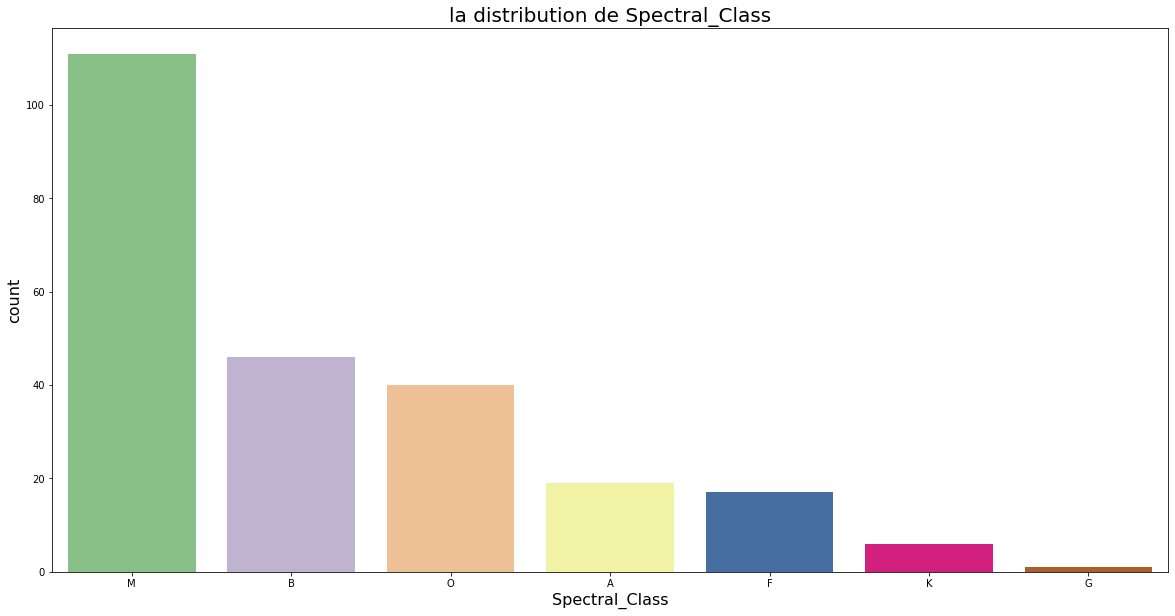

In [135]:
plt.figure(figsize=(20, 10))
plot = sns.countplot(x="Spectral_Class", data=data,
              order=data['Spectral_Class'].value_counts().index, palette="Accent")
plt.title("la distribution de Spectral_Class", fontsize=20)
plt.xlabel("Spectral_Class", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

    remarques :    

*   M est la classe spectrale la plus courante et G est la moins commune (une seule occurrence)


### encodage des variables Spectral_Class 


In [136]:
remap_dict_3 = {
    "M": 0,
    "K": 1,
    "G": 2,
    "F": 3,
    "A": 4,
    "B": 5,
    "O": 6
}

data["Spectral_Class"] = data["Spectral_Class"].map(remap_dict_3)
data["Spectral_Class"].unique()

array([0, 5, 4, 3, 6, 1, 2])

In [137]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_name
0,3068,0.002400,0.1700,16.12,0,0,0,Red
1,3042,0.000500,0.1542,16.60,0,0,0,Red
2,2600,0.000300,0.1020,18.70,0,0,0,Red
3,2800,0.000200,0.1600,16.65,0,0,0,Red
4,1939,0.000138,0.1030,20.06,0,0,0,Red


    remarques :    

*   Après codage, Spectral_Class est une variable ordinale avec des
valeurs allant de 0 à 6

### Countplots par valeur de variable target

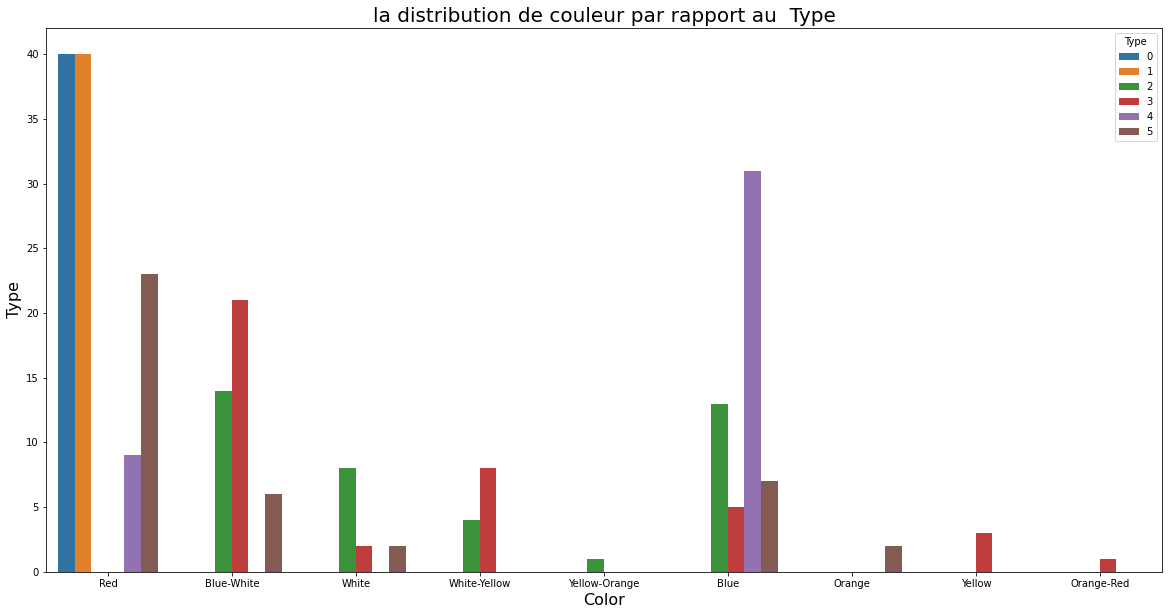

In [138]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Color_name", hue="Type", data=data)
plt.title("la distribution de couleur par rapport au  Type", fontsize=20)
plt.xlabel("Color", fontsize=16)
plt.ylabel("Type", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

    remarques : 

Les étoiles de type 0 et 1 sont exclusivement rouges .

Toutes les étoiles jaunes et orange-rouge sont de type 3

Toutes les étoiles jaune-orange sont de type 2

Toutes les étoiles orange sont de type 5




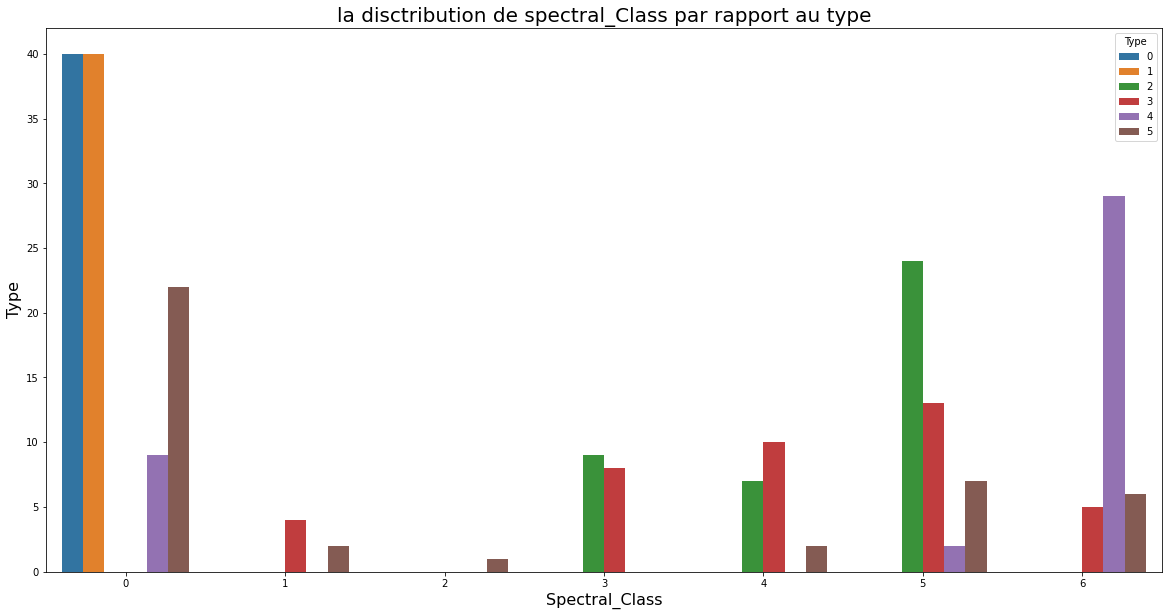

In [139]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Spectral_Class", hue="Type", data=data)
plt.title("la disctribution de spectral_Class par rapport au type", fontsize=20)
plt.xlabel("Spectral_Class", fontsize=16)
plt.ylabel("Type", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc="upper right", title="Type")
plt.show()

    remarques :    



*  Les étoiles de type 0 et 1 sont exclusivement de classe M


*  Toutes les étoiles de classe G sont de type 

*  La majorité des étoiles de type 4 appartiennent à la classe O

*  La majorité des étoiles de type 2 appartiennent à la classe B









---



### Correlation entre les variables

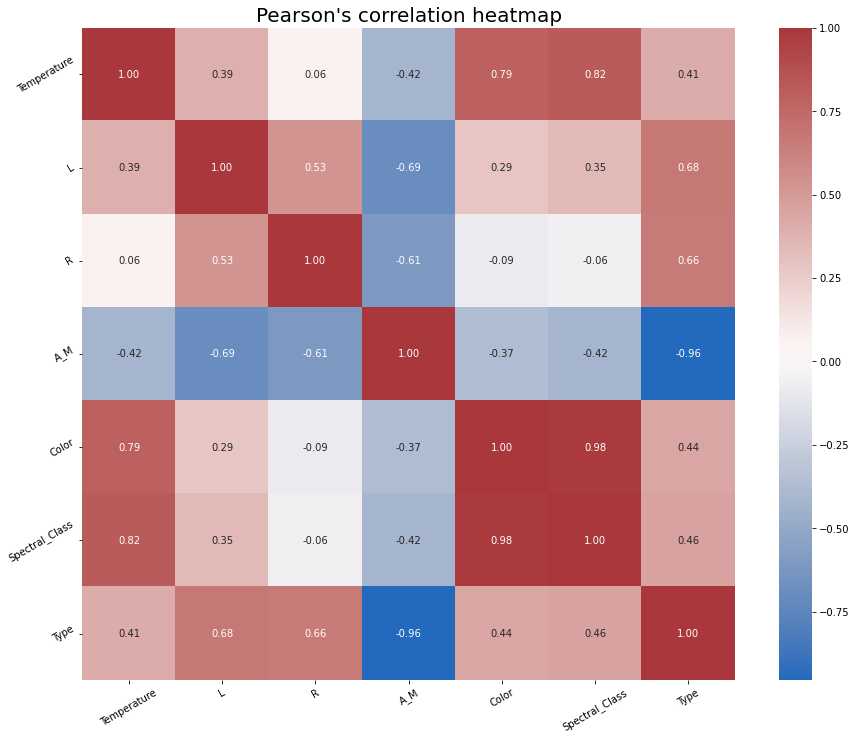

In [140]:
correlations = data.corr()
plt.figure(figsize=(16, 12))
ax = sns.heatmap(correlations, square=True, annot=True,
                 fmt='.2f', linecolor='white', cmap="vlag")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, fontsize=10)
plt.title("Pearson's correlation heatmap", fontsize=20)

plt.show()

    remarques :    

*  A_M et type sont très fortement corrélés négativement
*  A_M et L, R sont également corrélés négativement
*  Le type et L, R sont positivement corrélés
*  L et R sont positivement corrélés
*  La couleur et la température sont fortement corrélées positivement
*  Spectral_Class et la température sont fortement corrélés positivement
*  Spectral_Class et la couleur sont très fortement corrélés positivement














---



### Correlation pairplot

<Figure size 1152x1152 with 0 Axes>

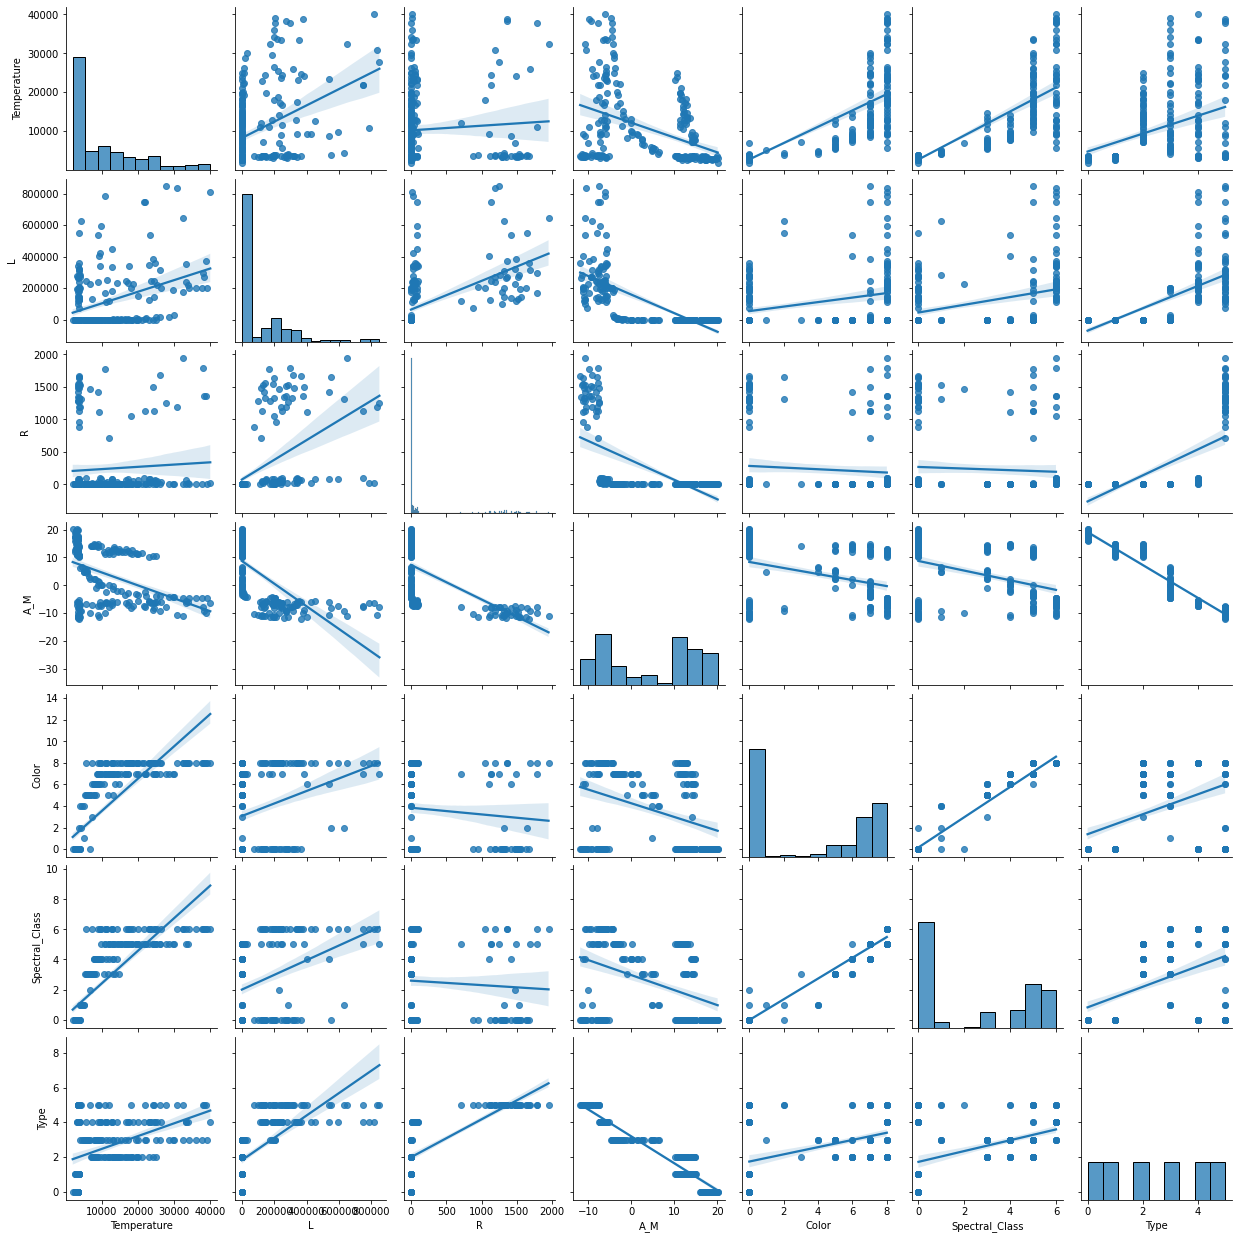

In [141]:
plt.figure(figsize=(16, 16))
sns.pairplot(data, kind='reg', diag_kind='hist', palette='Rainbow')
plt.show()

    remarques :    

    

---



### Suppression des versions non codées des variables catégorielle

In [142]:
data=data.drop(["Color_name","Color"], axis=1)

In [143]:
data.head()

,Temperature,L,R,A_M,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0,0
1,3042,0.000500,0.1542,16.60,0,0
2,2600,0.000300,0.1020,18.70,0,0
3,2800,0.000200,0.1600,16.65,0,0
4,1939,0.000138,0.1030,20.06,0,0


In [144]:
target=data['Type']
X=data.drop(["Type"], axis=1) #Définissez les variables pour entrer X qui contient tous les composants sauf la variable de Type(target)

In [145]:
#center et reduire les varaibles X par fontion 
def centrer_reduire(X):
  for i in X:
    if(i!='gender'):
      X[i]=(X[i]-X[i].mean())/X[i].std() #X=(X-moyenne(X))/ ecartype(X))
  return X
centrer_reduire(X)
X.head()

,Temperature,L,R,A_M,Spectral_Class
0,-0.777757,-0.597375,-0.458252,1.114416,-0.9957
1,-0.780479,-0.597375,-0.458283,1.159990,-0.9957
2,-0.826749,-0.597375,-0.458384,1.359372,-0.9957
3,-0.805812,-0.597375,-0.458272,1.164737,-0.9957
4,-0.895947,-0.597375,-0.458382,1.488496,-0.9957


## KNN MODEL

In [146]:
#Séparer les données d'entraînement et de test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( X, target, train_size=0.8,random_state=1)#les donnees d'entraînement=80% et test=20%

In [147]:
#definition de modele K plus proches voisins 
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3) #choisir un k aleatoire et regarder le resultat
knn.fit(xtrain, ytrain) #entrer les donnees d'entrainement dans le modele
print("accuracy",knn.score(xtest, ytest))

accuracy 0.9791666666666666


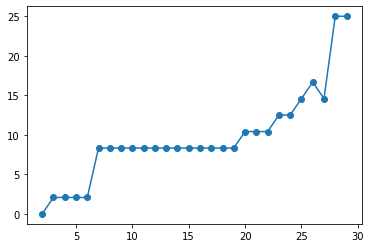

In [148]:
errors = []
for k in range(2,30): #tester le module en choisissant les k entre 2 jusqu à 30
  knn = neighbors.KNeighborsClassifier(k)
  errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,30), errors, 'o-') #afficher les erreurs de chaque k testé
plt.show()

# Analyse des composants prinpales

In [149]:
def display_scree_plot(pca): # la fonction affiche le porcentage d'inertie pour chaque composants et calculer la variation cumulé pour chaque composants
  scree = pca.explained_variance_ratio_*100
  plt.bar(np.arange(len(scree))+1, scree)
  plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker=
  'o')
  plt.xlabel("rang de l'axe d'inertie")
  plt.ylabel("pourcentage d'inertie")
  plt.title("Eboulis des valeurs propres")
  plt.show(block=False)
  plt.show()

Réduction des données à deux dimensions pour les afficher graphiquement

In [150]:
from sklearn import decomposition, preprocessing
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)
pca = decomposition.PCA(n_components= 2)
pca.fit(X)
reduced_data = pca.transform(X)

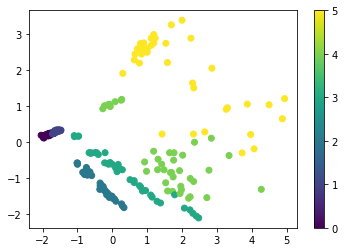

In [151]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=target)
plt.colorbar() # les valeurs qui on en jaunes appartiennent a la classe 5 , les valeurs en vert appartiennent a la classe 4 , les valeurs en bleu ciel appartiennent a la classe 3 , les valeurs en bleu foncé appartiennent a la classe 2 , les valeurs en move appartiennent a la classe 1 , les valeurs en mauve foncé appartiennent a la classe 0


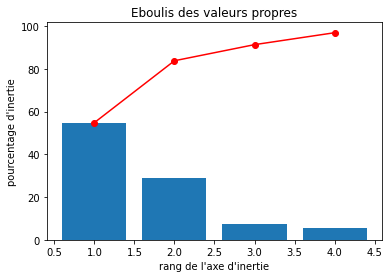

In [152]:
X = preprocessing.StandardScaler(with_std=True).fit_transform(X)
pca = decomposition.PCA(n_components= .95)
pca.fit(X)
X_projected = pca.transform(X)
display_scree_plot(pca)


In [153]:
print('nombre des composants',np.shape(X_projected)[1])

nombre des composants 4


In [154]:
print("composante 1:",pca.explained_variance_ratio_[0]*100)
print("composante 2:",pca.explained_variance_ratio_[1]*100)
print("composante 3:",pca.explained_variance_ratio_[2]*100)
print("composante 4:",pca.explained_variance_ratio_[3]*100)

composante 1: 54.81267378799334
composante 2: 28.985040541482498
composante 3: 7.5352614802145945
composante 4: 5.583869252813402


d'appres le graphe , on remarque que le composant 1 est conserve 55% de la variance ,

 le composant 2 conserve 28% de la variance 
 
 , le composant 3 conserve 7% de la variance

 , le composant 4 conserve 5% de la variance

 donc on conserve 95% de la variance cad on perd 5% des informations sur les données

In [155]:
xtrain, xtest, ytrain, ytest = train_test_split( reduced_data, target, train_size=0.8,random_state=1)# entrainer avec les dimontion reduit

# Validation Croisé

In [156]:
from sklearn import metrics
from sklearn import model_selection

#Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target,test_size=0.3 )

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':range(2,30)}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), # un classifieur kNN
param_grid, # hyperparamètres à tester
cv=5, # nombre de folds de validation croisée
scoring=score # score à optimiser
)

In [157]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)}, scoring='accuracy')

In [158]:
# Afficher le(s) hyperparamètre(s) optimaux
print ("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 2}


In [159]:
# Afficher les performances correspondantes
print ("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'],  clf.cv_results_['std_test_score'],  clf.cv_results_['params'] ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, mean, std * 2, params ))

Résultats de la validation croisée :
	accuracy = 0.970 (+/-0.001) for {'n_neighbors': 2}
	accuracy = 0.970 (+/-0.001) for {'n_neighbors': 3}
	accuracy = 0.952 (+/-0.030) for {'n_neighbors': 4}
	accuracy = 0.952 (+/-0.029) for {'n_neighbors': 5}
	accuracy = 0.946 (+/-0.024) for {'n_neighbors': 6}
	accuracy = 0.947 (+/-0.023) for {'n_neighbors': 7}
	accuracy = 0.952 (+/-0.047) for {'n_neighbors': 8}
	accuracy = 0.947 (+/-0.043) for {'n_neighbors': 9}
	accuracy = 0.947 (+/-0.068) for {'n_neighbors': 10}
	accuracy = 0.935 (+/-0.057) for {'n_neighbors': 11}
	accuracy = 0.917 (+/-0.058) for {'n_neighbors': 12}
	accuracy = 0.917 (+/-0.070) for {'n_neighbors': 13}
	accuracy = 0.916 (+/-0.070) for {'n_neighbors': 14}
	accuracy = 0.917 (+/-0.087) for {'n_neighbors': 15}
	accuracy = 0.869 (+/-0.090) for {'n_neighbors': 16}
	accuracy = 0.905 (+/-0.115) for {'n_neighbors': 17}
	accuracy = 0.857 (+/-0.087) for {'n_neighbors': 18}
	accuracy = 0.869 (+/-0.081) for {'n_neighbors': 19}
	accuracy = 0.851

    Remarques :    

   on remarque que la moyenne d'accuracy de test des données d'entrainement la plus grandes est 97% avec la variance 0.038 utilisant le k=3

---



In [160]:
y_pred = clf.predict(X_test)
print ("\nSur le jeu de test : %0.3f" % metrics.accuracy_score(y_test, y_pred))


Sur le jeu de test : 0.986


l'accuracy de test sur les données de test est 98%

In [161]:
from sklearn.metrics import confusion_matrix

# confusion matrix
print(confusion_matrix( y_pred,y_test))

[[14  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0  8  1]
 [ 0  0  0  0  0  9]]


le modele predicte correctement 10 parmi 10 de la classe 0

le modele predicte correctement 13 parmi 13 de la classe 1

le modele predicte correctement 13 parmi 10 de la classe 2

le modele predicte correctement 7 parmi 7 de la classe 3

le modele predicte correctement 16 parmi 16 de la classe 4

le modele predicte correctement 12 parmi 10 de la classe 5



In [162]:
from sklearn.metrics import classification_report

# raport de classification
print(classification_report(y_test, y_pred, target_names = ['0', '1','2','3','4','5']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        16
           4       0.89      1.00      0.94         8
           5       1.00      0.90      0.95        10

    accuracy                           0.99        72
   macro avg       0.98      0.98      0.98        72
weighted avg       0.99      0.99      0.99        72

